In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding="ISO-8859-1")

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning
# 2. Exploratory Data Analysis (EDA)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements

# 1. Data Cleaning

# * Renaming column names

In [ ]:
df.rename(columns = {'v1': 'status', 'v2': 'text'}, inplace = True)

In [ ]:
df.head()

,status,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# * Missing values

In [ ]:
df.isnull().sum()

status           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

* Here, we can see that almost 98% of the data is null in last 3 columns. Hence, we will drop these 3 columns.

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [ ]:
df.head()

,status,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# * Duplicate values:

In [ ]:
df.duplicated().sum()

403

* There are 403 duplicate values in our data. Hence, we will delete duplicate rows.

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.duplicated().sum()

0

# * Fetch total number of characters:

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

# Natural Language Toolkit

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['total_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,index,status,text,total_characters
0,0,ham,"Go until jurong point, crazy.. Available only ...",111
1,1,ham,Ok lar... Joking wif u oni...,29
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,3,ham,U dun say so early hor... U c already then say...,49
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# * Fetch total number of words:

In [ ]:
nltk.word_tokenize(df['text'][0])

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [ ]:
df['total_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,index,status,text,total_characters,total_words
0,0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,1,ham,Ok lar... Joking wif u oni...,29,8
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,3,ham,U dun say so early hor... U c already then say...,49,13
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


# * Fetch total number of sentences:

In [ ]:
df['total_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,index,status,text,total_characters,total_words,total_sentences
0,0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,ham,Ok lar... Joking wif u oni...,29,8,2
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,3,ham,U dun say so early hor... U c already then say...,49,13,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# 2. EDA

In [ ]:
df['status'].value_counts()

ham     4516
spam     653
Name: status, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff72737c520>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

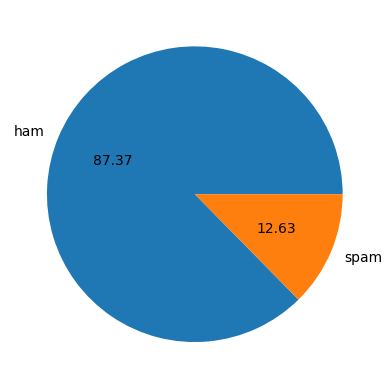

In [ ]:
plt.pie(df['status'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')

* Data is imbalanced

In [ ]:
df.describe()

,index,total_characters,total_words,total_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,2734.699362,78.977945,18.455794,1.965564
std,1613.241267,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,1331.000000,36.000000,9.000000,1.000000
50%,2703.000000,60.000000,15.000000,1.000000
75%,4129.000000,117.000000,26.000000,2.000000
max,5571.000000,910.000000,220.000000,38.000000


* Characters:
    
    1. Maximum number of characters in a paragraph: 910
    2. Minimum number of characters in a paragraph: 2
    3. Average number of characters in a paragraph: 78.97
        

* Words:
    
    1. Maximum number of words in a paragraph: 220
    2. Minimum number of words in a paragraph: 1
    3. Average number of words in a paragraph: 18.45
        

* Sentences:
    
    1. Maximum number of sentences in a paragraph: 28
    2. Minimum number of sentences in a paragraph: 1
    3. Average number of sentences in a paragraph: 1.94
    

In [ ]:
df.describe(include = 'object')

,status,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
# Spam Messages

df[df['status'] == 'spam'].describe()

,index,total_characters,total_words,total_sentences
count,653.000000,653.000000,653.000000,653.000000
mean,2602.108729,137.891271,27.667688,2.970904
std,1638.882528,30.137753,7.008418,1.488425
min,2.000000,13.000000,2.000000,1.000000
25%,1104.000000,132.000000,25.000000,2.000000
50%,2524.000000,149.000000,29.000000,3.000000
75%,4034.000000,157.000000,32.000000,4.000000
max,5567.000000,224.000000,46.000000,9.000000


In [ ]:
# Ham Mesaages

df[df['status'] == 'ham'].describe()

,index,total_characters,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000,4516.000000
mean,2753.871568,70.459256,17.123782,1.820195
std,1608.779538,56.358207,13.493970,1.383657
min,0.000000,2.000000,1.000000,1.000000
25%,1359.750000,34.000000,8.000000,1.000000
50%,2734.500000,52.000000,13.000000,1.000000
75%,4148.250000,90.000000,22.000000,2.000000
max,5571.000000,910.000000,220.000000,38.000000


# * Words:

<Axes: xlabel='total_words', ylabel='Count'>

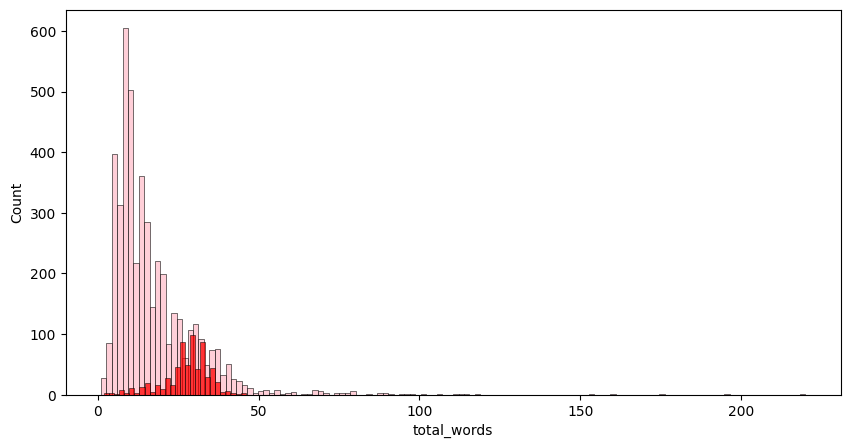

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(df[df['status'] == 'ham']['total_words'], color = 'pink')
sns.histplot(df[df['status'] == 'spam']['total_words'], color = 'red')

* Spam message contains more words than normal messages.

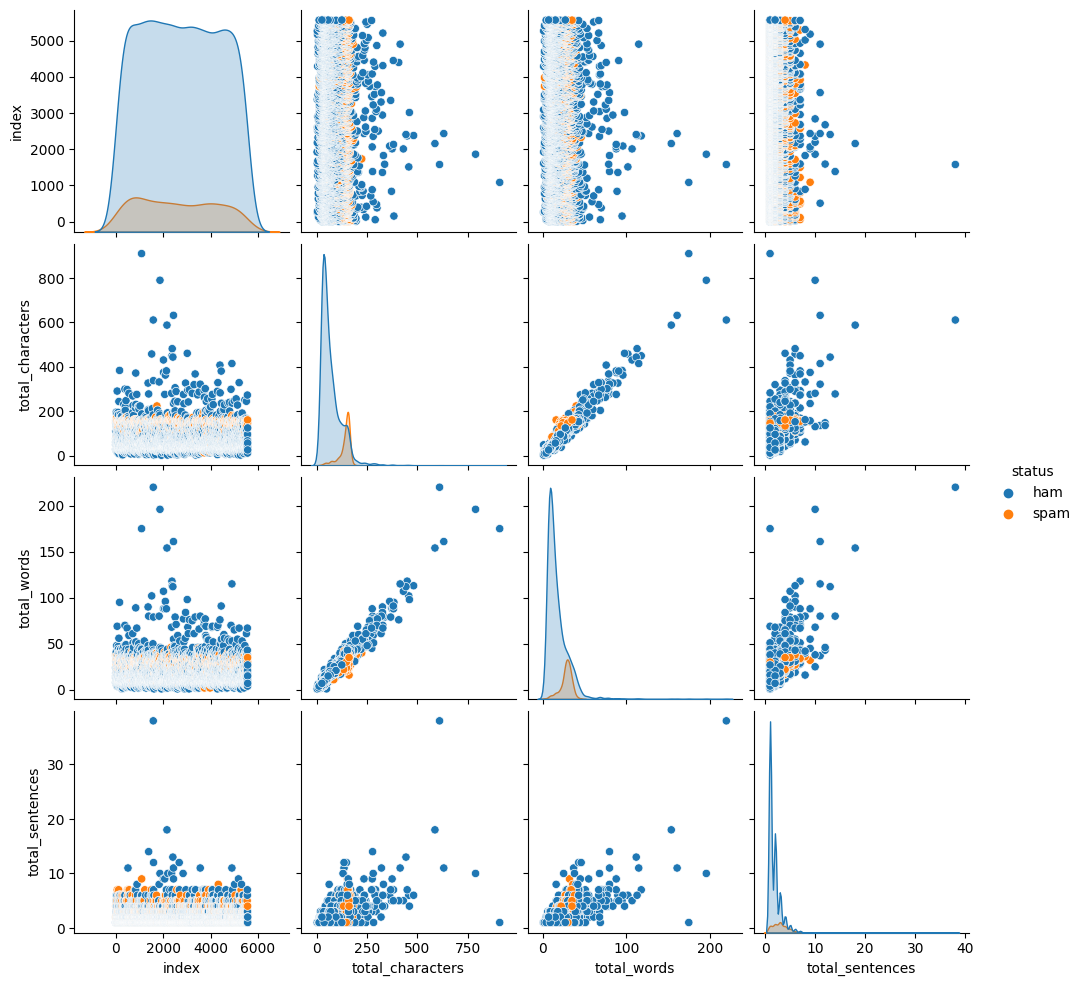

In [ ]:
sns.pairplot(df, hue ='status')

* Words have the linear relationship with characters.

* Outliers are present in the data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['status'] = encoder.fit_transform(df['status'])

<Axes: >

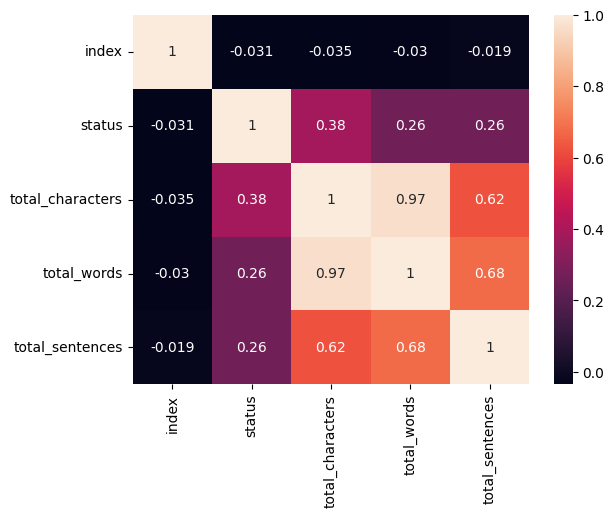

In [ ]:
sns.heatmap(df.corr(), annot = True)

* Characters, Words and Sentences are highly correlated to each. So, we will keep only one of them.

# 3. Data Preprocessing

1. Lower Case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuations
5. Stemming

# * Lower Case:

In [ ]:
df['transformed_text'] = df['text'].apply(lambda x : x.lower())

In [ ]:
df.head()

,index,status,text,total_characters,total_words,total_sentences,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."


# * Tokenization:

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
df.head()

,index,status,text,total_characters,total_words,total_sentences,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


# * Removing special characters:

In [ ]:
def rem_spl_chars(x):
    list = []
    for i in x:
        if i.isalnum():
            list.append(i)
    return list

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(rem_spl_chars)

In [ ]:
df.head()

,index,status,text,total_characters,total_words,total_sentences,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, crazy, available, o..."
1,1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, think, he, goes, to, usf, he, liv..."


# * Removing stopwords:

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def rem_stpwords(x):
    from nltk.corpus import stopwords
    list = []
    for i in x:
        if i not in stopwords.words('english'):
            list.append(i)
    return list

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(rem_stpwords)

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(lambda x : " ".join(x))

In [ ]:
df.head()

,index,status,text,total_characters,total_words,total_sentences,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


# * Generate Word Cloud:

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['status'] == 1]['transformed_text'].str.cat(sep = " "))

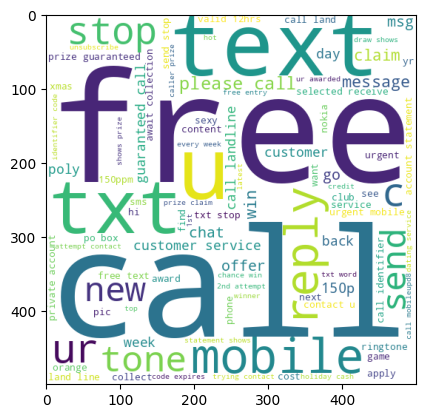

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['status'] == 0]['transformed_text'].str.cat(sep = " "))

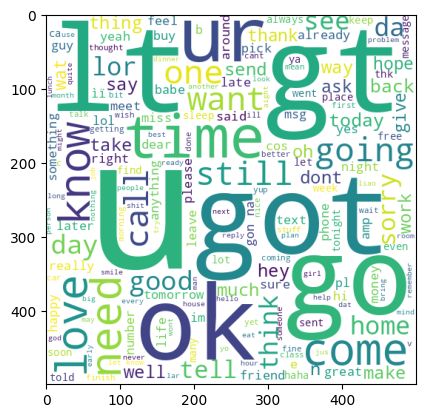

In [ ]:
plt.imshow(ham_wc)

# * Extract top 20 spam words:

In [ ]:
spam_count = []
for i in df[df['status'] == 1]['transformed_text'].tolist():
  for j in i.split():
    spam_count.append(j)

print(len(spam_count))
print(spam_count)

9939
['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18', 'freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hours', 'mobile', '11', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free', '08002986030', 'six', 'chances', 'win', 'cash', '100', 'pounds', 'txt', 'csh11', 'send', 'cost', '6days', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', '

* We have total 9939 spam words

In [ ]:
from collections import Counter

In [ ]:
print(Counter(spam_count).most_common(20))

[('call', 302), ('free', 191), ('2', 155), ('txt', 130), ('u', 119), ('ur', 119), ('mobile', 105), ('text', 104), ('stop', 104), ('4', 97), ('claim', 96), ('reply', 96), ('prize', 81), ('get', 70), ('new', 64), ('send', 58), ('urgent', 57), ('nokia', 54), ('cash', 51), ('contact', 51)]


In [ ]:
spam_20 = pd.DataFrame(Counter(spam_count).most_common(20))
spam_20

,0,1
0,call,302
1,free,191
2,2,155
3,txt,130
4,u,119
5,ur,119
6,mobile,105
7,text,104
8,stop,104
9,4,97


Text(0, 0.5, 'Count Of Spam Words')

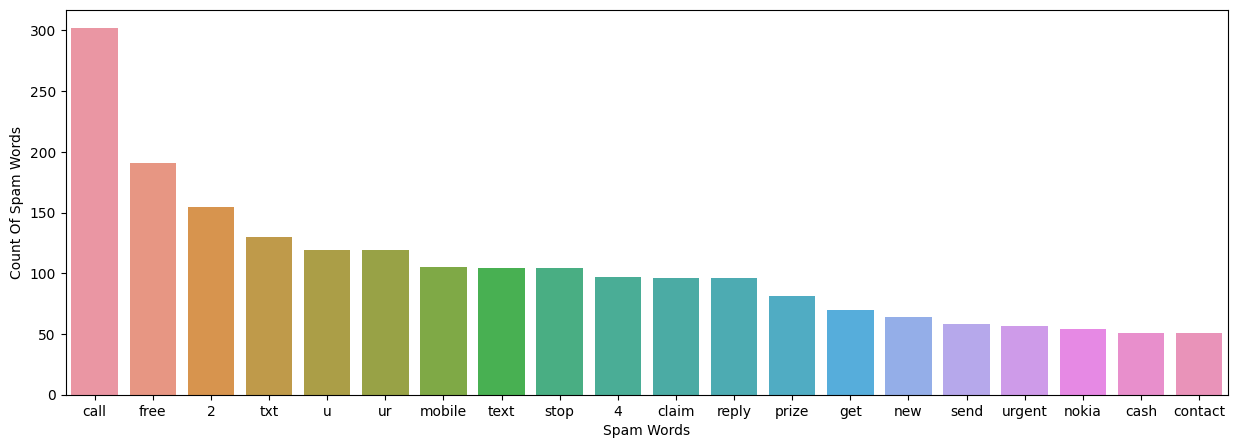

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 0, y = 1, data = spam_20)
plt.xlabel('Spam Words')
plt.ylabel('Count Of Spam Words')

* Above graph shows the top 20 spam words and their counts.

# * Extract top 20 ham words:

In [ ]:
ham_count = []
for i in df[df['status'] == 0]['transformed_text'].tolist():
  for j in i.split():
    ham_count.append(j)

print(len(ham_count))
print(ham_count)

35404
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say', 'nah', 'think', 'goes', 'usf', 'lives', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent', 'per', 'request', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', '9', 'copy', 'friends', 'callertune', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight', 'k', 'cried', 'enough', 'today', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'granted', 'fulfil', 'promise', 'wonderful', 'blessing', 'times', 'date', 'sunday', 'oh', 'k', 'watching', 'eh', 'u', 'remember', '2', 'spell', 'name', 'yes', 'v', 'naughty', 'make', 'v', 'wet', 'fine', 'thatåõs', 'way', 'u', 'feel', 'thatåõs', 'way', 'gota', 'b', 'seriously',

* We have total 35404 ham words

In [ ]:
print(Counter(ham_count).most_common(20))

[('u', 883), ('get', 293), ('gt', 288), ('lt', 287), ('2', 284), ('go', 240), ('got', 236), ('know', 225), ('like', 221), ('ok', 217), ('good', 212), ('come', 211), ('ur', 197), ('time', 188), ('call', 184), ('love', 172), ('day', 166), ('going', 164), ('want', 159), ('lor', 159)]


In [ ]:
ham_20 = pd.DataFrame(Counter(ham_count).most_common(20))
ham_20

,0,1
0,u,883
1,get,293
2,gt,288
3,lt,287
4,2,284
5,go,240
6,got,236
7,know,225
8,like,221
9,ok,217


Text(0, 0.5, 'Count Of Ham Words')

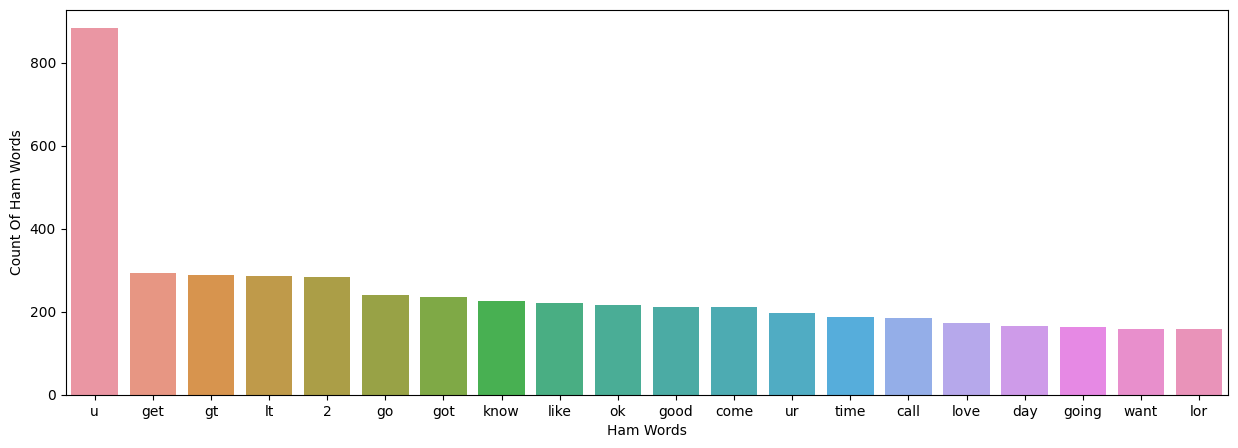

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 0, y = 1, data = ham_20)
plt.xlabel('Ham Words')
plt.ylabel('Count Of Ham Words')

# 4. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
vectors = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf.get_feature_names_out()

array(['008704050406', '0089', '0121', ..., 'åôrents', 'ìä', 'ìï'],
      dtype=object)

# 5. Model Building

* We will perform:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. AdaBoost Classifier
5. Bagging Classifier
6. SVM
7. Naive Bayes Classifier
8. KNieghbor Classifier
9. Gradient Boosting Classifier
10. XGB Classifier

# * SMOTE

* Since, our data is highly imbalanced. We will perform SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X,y = SMOTE().fit_resample(vectors,df['status'])

In [ ]:
print(X.shape)
print(y.shape)

(9032, 8002)
(9032,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

# * Scorecard Function

In [ ]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score', 'Precision_Score', 'Recall_Score', 'F1_Score'])

In [ ]:
def score_card(d_f, model_name, y_pred, y_test):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    dfx = d_f.append(pd.Series({'Model_name': model_name,
                     'Accuracy_Score': accuracy_score(y_test, y_pred),
                     'Precision_Score': precision_score(y_test, y_pred, average = 'macro'),
                     'Recall_Score': recall_score(y_test, y_pred, average = 'macro'),
                     'F1_Score': f1_score(y_test, y_pred, average = 'macro')}), ignore_index = True)
    return dfx

# 1. Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

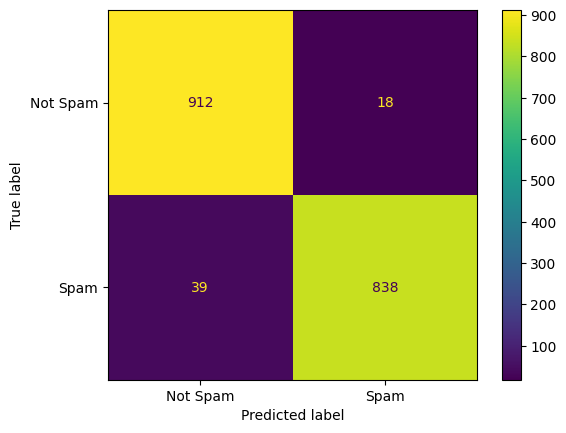

In [ ]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
model_lr = lr.fit(X_train, y_train)
ypred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, ypred_lr)
(ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df101 = score_card(df_scorecard, 'Logistic Regression', ypred_lr, y_test)
df101

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403


# 2. Decision Tree Classifier: Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

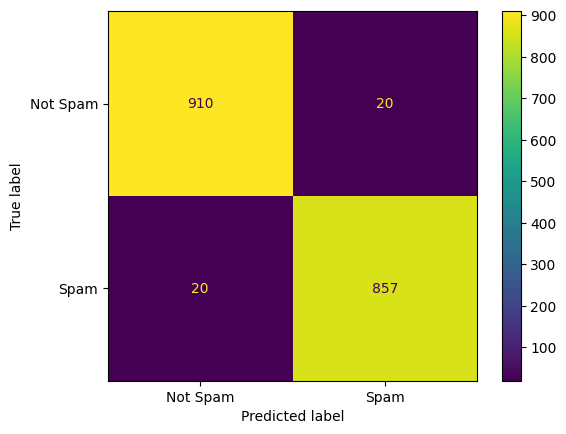

In [ ]:
dtc_en = DecisionTreeClassifier(criterion = 'entropy')
model_en = dtc_en.fit(X_train, y_train)
ypred_en = model_en.predict(X_test)
cm_en = confusion_matrix(y_test, ypred_en)
(ConfusionMatrixDisplay(confusion_matrix = cm_en, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df102 = score_card(df101, 'Decision Tree: Entropy', ypred_en, y_test)
df102

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845


# 3. Decision Tree: Gini

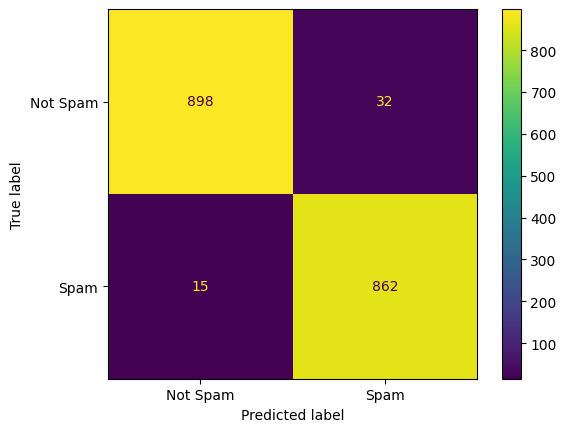

In [ ]:
dtc_gn = DecisionTreeClassifier(criterion = 'gini')
model_gn = dtc_gn.fit(X_train, y_train)
ypred_gn = model_gn.predict(X_test)
cm_gn = confusion_matrix(y_test, ypred_gn)
(ConfusionMatrixDisplay(confusion_matrix = cm_gn, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df103 = score_card(df102, 'Decision Tree: Gini', ypred_gn, y_test)
df103

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980


# 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

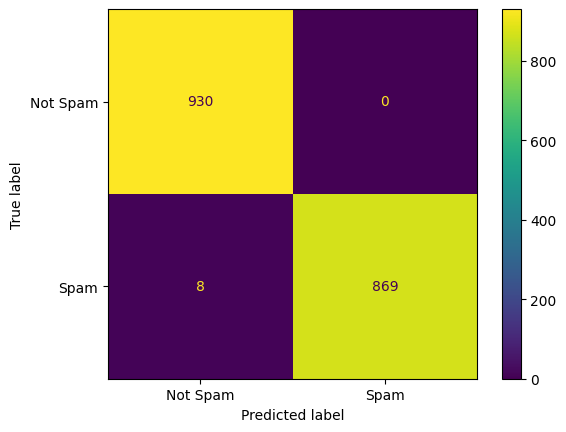

In [ ]:
rf = RandomForestClassifier(n_estimators = 80, random_state = 102)
model_rf = rf.fit(X_train, y_train)
ypred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, ypred_rf)
(ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df104 = score_card(df103, 'Random Forest', ypred_rf, y_test)
df104

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568


# 5. Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

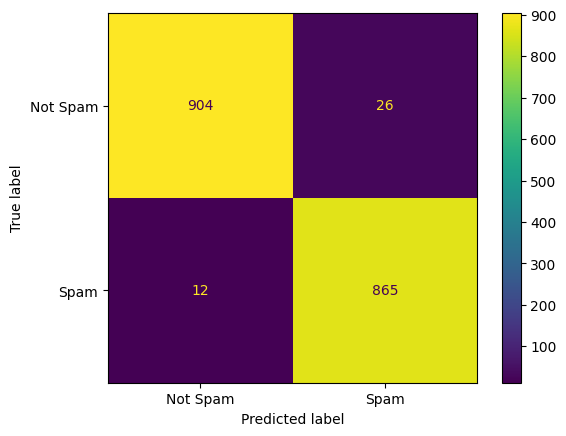

In [ ]:
bg = BaggingClassifier(n_estimators = 80, random_state = 102)
model_bg = bg.fit(X_train, y_train)
ypred_bg = model_bg.predict(X_test)
cm_bg = confusion_matrix(y_test, ypred_bg)
(ConfusionMatrixDisplay(confusion_matrix = cm_bg, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df105 = score_card(df104, 'Bagging Classifier', ypred_bg, y_test)
df105

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961


# 6. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

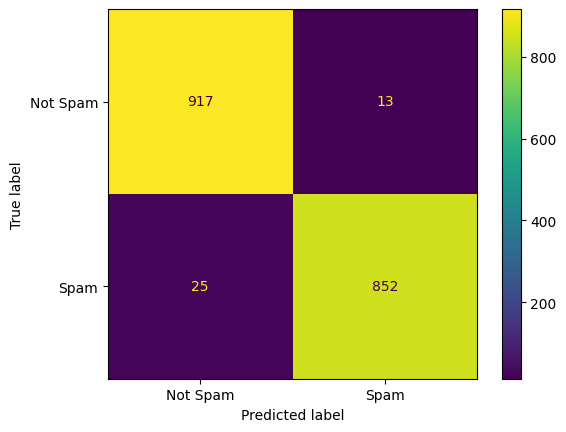

In [ ]:
ab = AdaBoostClassifier(n_estimators = 80, random_state = 102)
model_ab = ab.fit(X_train, y_train)
ypred_ab = model_ab.predict(X_test)
cm_ab = confusion_matrix(y_test, ypred_ab)
(ConfusionMatrixDisplay(confusion_matrix = cm_ab, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df106 = score_card(df105, 'AdaBoost Classifier', ypred_ab, y_test)
df106

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961
5,AdaBoost Classifier,0.978971,0.979216,0.978758,0.978943


# 7. Gradient Boosting Classifier:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

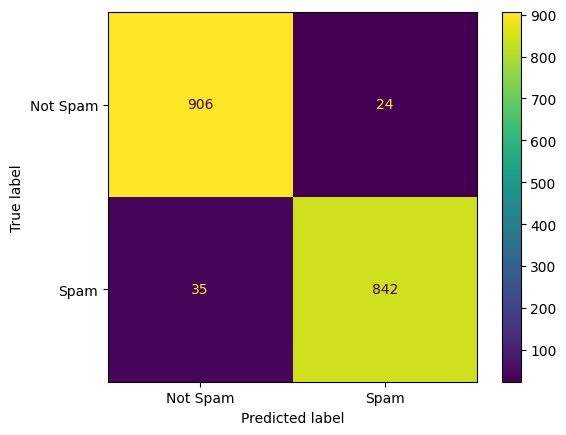

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 80, random_state = 102)
model_gbc = gbc.fit(X_train, y_train)
ypred_gbc = model_gbc.predict(X_test)
cm_gbc = confusion_matrix(y_test, ypred_gbc)
(ConfusionMatrixDisplay(confusion_matrix = cm_gbc, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df107 = score_card(df106, 'Gradient Boosting Classifier', ypred_gbc, y_test)
df107

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961
5,AdaBoost Classifier,0.978971,0.979216,0.978758,0.978943
6,Gradient Boosting Classifier,0.967349,0.967546,0.967142,0.967308


# 8. SVM

In [ ]:
from sklearn.svm import SVC

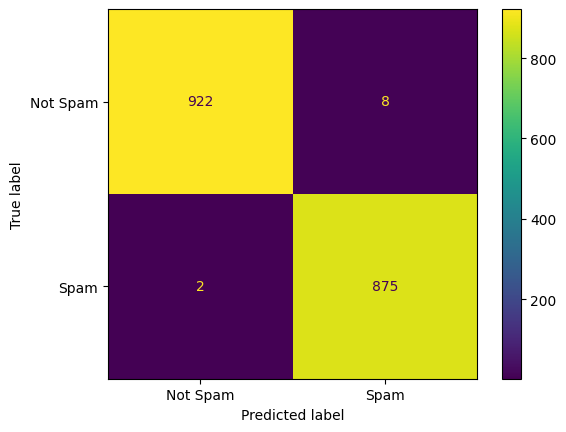

In [ ]:
svm = SVC(kernel = 'sigmoid')
model_svm = svm.fit(X_train, y_train)
ypred_svm = model_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, ypred_svm)
(ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df108 = score_card(df107, 'SVM', ypred_svm, y_test)
df108

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961
5,AdaBoost Classifier,0.978971,0.979216,0.978758,0.978943
6,Gradient Boosting Classifier,0.967349,0.967546,0.967142,0.967308
7,SVM,0.994466,0.994388,0.994559,0.994462


# 9. Naive Bayes: Binomial

In [ ]:
from sklearn.naive_bayes import BernoulliNB

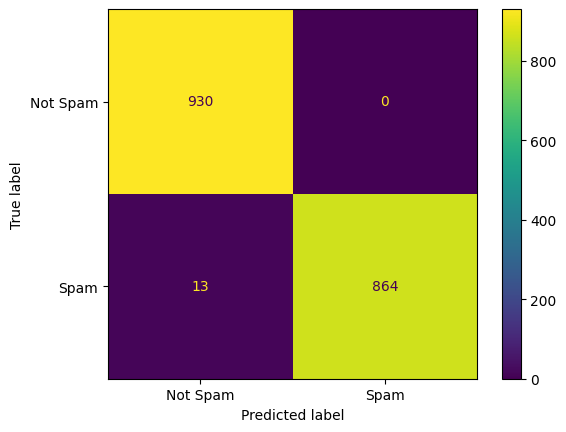

In [ ]:
bnb = BernoulliNB()
model_bnb = bnb.fit(X_train, y_train)
ypred_bnb = model_bnb.predict(X_test)
cm_bnb = confusion_matrix(y_test, ypred_bnb)
(ConfusionMatrixDisplay(confusion_matrix = cm_bnb, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df109 = score_card(df108, 'Naive Bayes: Bernoulli', ypred_bnb, y_test)
df109

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961
5,AdaBoost Classifier,0.978971,0.979216,0.978758,0.978943
6,Gradient Boosting Classifier,0.967349,0.967546,0.967142,0.967308
7,SVM,0.994466,0.994388,0.994559,0.994462
8,Naive Bayes: Bernoulli,0.992806,0.993107,0.992588,0.992796


# 10. KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

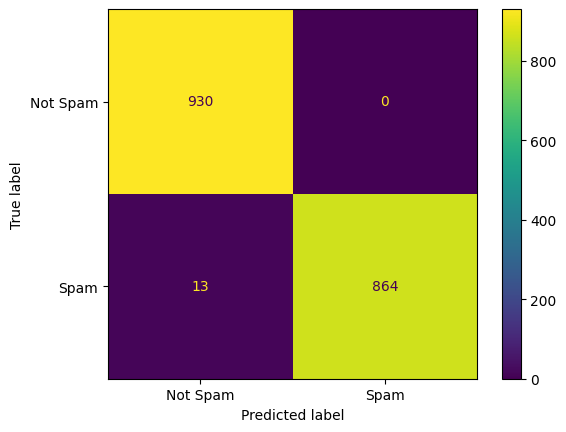

In [ ]:
knc = KNeighborsClassifier()
model_knc = knc.fit(X_train, y_train)
ypred_knc = model_knc.predict(X_test)
cm_knc = confusion_matrix(y_test, ypred_knc)
(ConfusionMatrixDisplay(confusion_matrix = cm_knc, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df110 = score_card(df109, 'KNeighbors Classifier', ypred_knc, y_test)
df110

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961
5,AdaBoost Classifier,0.978971,0.979216,0.978758,0.978943
6,Gradient Boosting Classifier,0.967349,0.967546,0.967142,0.967308
7,SVM,0.994466,0.994388,0.994559,0.994462
8,Naive Bayes: Bernoulli,0.992806,0.993107,0.992588,0.992796
9,KNeighbors Classifier,0.992806,0.993107,0.992588,0.992796


# 11. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

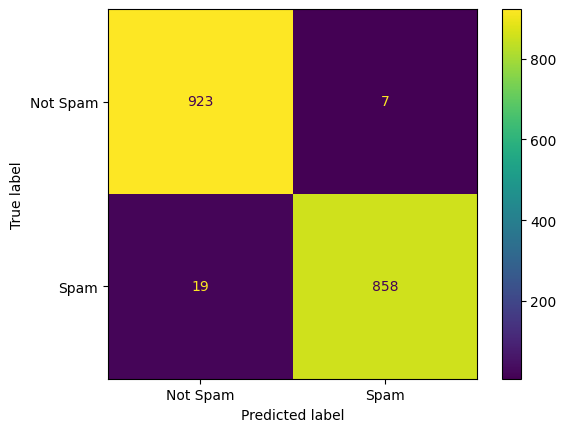

In [ ]:
xgb = XGBClassifier(n_estimators = 80, random_state = 102)
model_xgb = xgb.fit(X_train, y_train)
ypred_xgb = model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, ypred_xgb)
(ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ['Not Spam', 'Spam'])).plot()

In [ ]:
df111 = score_card(df110, 'XGBoost Classifier', ypred_xgb, y_test)
df111

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
3,Random Forest,0.995573,0.995736,0.995439,0.995568
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961
5,AdaBoost Classifier,0.978971,0.979216,0.978758,0.978943
6,Gradient Boosting Classifier,0.967349,0.967546,0.967142,0.967308
7,SVM,0.994466,0.994388,0.994559,0.994462
8,Naive Bayes: Bernoulli,0.992806,0.993107,0.992588,0.992796
9,KNeighbors Classifier,0.992806,0.993107,0.992588,0.992796


In [ ]:
df111.sort_values('Precision_Score', ascending = False)

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
3,Random Forest,0.995573,0.995736,0.995439,0.995568
7,SVM,0.994466,0.994388,0.994559,0.994462
8,Naive Bayes: Bernoulli,0.992806,0.993107,0.992588,0.992796
9,KNeighbors Classifier,0.992806,0.993107,0.992588,0.992796
10,XGBoost Classifier,0.985612,0.985869,0.985404,0.985593
5,AdaBoost Classifier,0.978971,0.979216,0.978758,0.978943
4,Bagging Classifier,0.978971,0.978859,0.979180,0.978961
1,Decision Tree: Entropy,0.977864,0.977845,0.977845,0.977845
2,Decision Tree: Gini,0.973990,0.973888,0.974244,0.973980
0,Logistic Regression,0.968456,0.968981,0.968088,0.968403


# * Accuracy Score

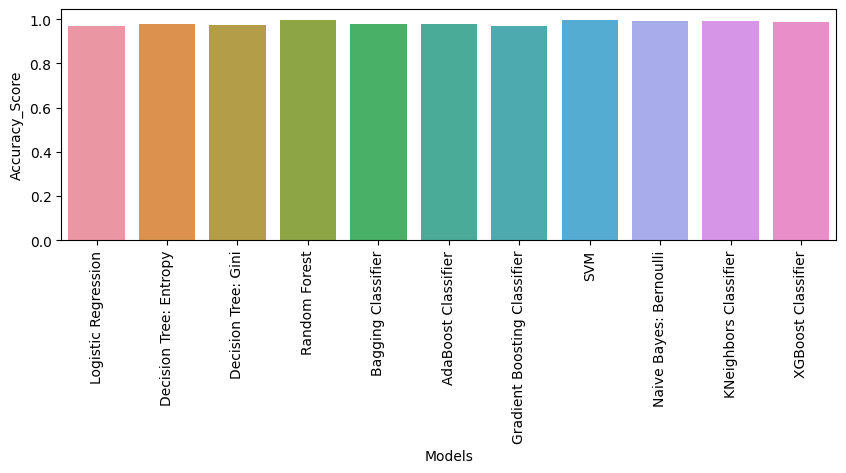

In [ ]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'Model_name', y = 'Accuracy_Score', data = df111)
plt.xlabel('Models')
plt.ylabel('Accuracy_Score')
plt.xticks(rotation = 90)
plt.show()

# * Precision Score

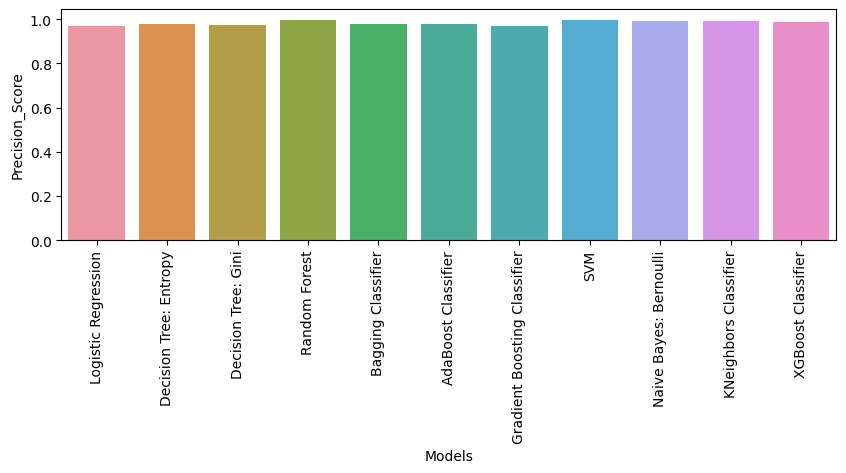

In [ ]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'Model_name', y = 'Precision_Score', data = df111)
plt.xlabel('Models')
plt.ylabel('Precision_Score')
plt.xticks(rotation = 90)
plt.show()

* Here, we can see that "Random Forest" and "Bernouli" Naive Bayes are giving very good results.

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))